In [0]:
# Based on https://docs.sympy.org/latest/tutorial/preliminaries.html
import sympy
import os
from sympy import *
from sympy.geometry import *

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)

if 'HOME' in os.environ:
    if 'Windows' in os.environ['OS']:
        print('Windows detected')
    else:
        # Google Colab Latex printing setup
        init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
# """ DIVISION IMPORTANT NOTE
# In divisions of python numbers(integers) 
# use Rational function to get exact results
# >>> Rational(1,2)  # = 1/2 """
# EXACT result use evalf => sqrt(8).evalf(5) = 2.8284
# """ GRAPHVIZ ON SYMPY
# from sympy.printing.dot import dotprint
# from graphviz import Source
# dot = Source(dotprint(x**2))
# dot
# """
# srepr(function)

In [229]:
# Complex CELL
from sympy import *
from mpmath import *
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 12))
x, y = symbols('x y', real=True)

# Functions
# Create
c10 = mpc(10,10) # c10 = 10 + j*10
c1 = mpc(1,1)    # c1 = 1 + j*1
c2 = mpc(2,2)    # c2 = 2 + j*2

# Conjugate
print("Conjugated c2:\t", conj(c2)) 
print("c1 + c2:\t", fsum([c1, c2]))
print("c1 - c2:\t", fsum([c1, -c2]))
print("c1 * c2:\t", fmul(c1, c2)) 
print("c1 * c2:\t", fprod([c1, c2])) 
print("c1 / c2:\t", fdiv(c1, c2))

def expr2mpc(expr):
  """ Example
  s = 2*I
  f = 1/(s*(s+1))
  f_Cart = expr2mpc(f)
  """
  complx = expr.as_real_imag()
  return mpc(complx[0], complx[1])

def cart2pol(zCart):
  R = abs(zCart)
  theta = phase(zCart)
  return(R, theta)

def pol2cart(zPolar):
  R = zPolar[0]
  theta = zPolar[1]
  x = R * cos(theta)
  y = R * sin(theta)
  return mpc(x,y)

def pol2DegPrint(zPolar):
  R = zPolar[0]
  theta = zPolar[1]*180/pi
  return (str(R) + " ∠ " + str(theta) + "°")

def pol2PositiveDegPrint(zPolar):
  R = zPolar[0]
  theta = zPolar[1]
  if(theta < 0):
    theta = 360 + theta*180/pi
  return (str(R) + " ∠ " + str(theta) + "°")

# Plot
def cart2Plt(zCart):
  plt.scatter(re(zCart), im(zCart), color='red')
  plt.axhline(linewidth=2, color='black')
  plt.axvline(linewidth=2, color='black')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()
  
def polar2Plt(zPolar):
  R = zPolar[0]
  theta = zPolar[1]
  plt.polar(theta, R, 'k.', color='red')
  plt.axhline(linewidth=2, color='black')
  plt.axvline(linewidth=2, color='black')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()


Conjugated c2:	 (2.0 - 2.0j)
c1 + c2:	 (3.0 + 3.0j)
c1 - c2:	 (-1.0 - 1.0j)
c1 * c2:	 (0.0 + 4.0j)
c1 * c2:	 (0.0 + 4.0j)
c1 / c2:	 (0.5 + 0.0j)


<Figure size 1296x864 with 0 Axes>

In [230]:
from sympy import *
from sympy.abc import x,y
from mpmath import *

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 12))

# Complex Numbers
"""
https://docs.sympy.org/0.6.7/modules/mpmath/basics.html#conversion-and-utilities-for-numbers
For this section mpmath library will be used, mpmath provides following types:
Class	  Description
mpf	    Real float
mpc	    Complex float
mpi	    Real interval
matrix	Matrix
"""
x, y = symbols('x y', real=True)

<Figure size 1296x864 with 0 Axes>

Cartesian coordinates
10.0 + j* 10.0


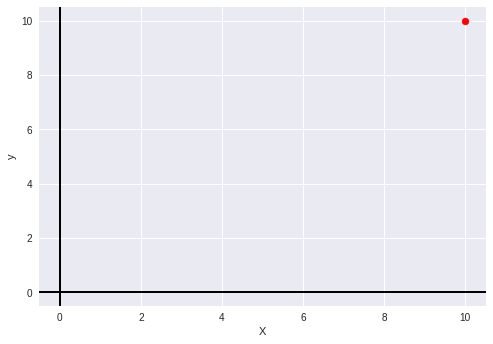

In [157]:
# Cartesian
c10 = mpc(10,10)
c1 = mpc(1,1)
c2 = mpc(2,2)

# Plot function
def cart2Plt(zCart):
  plt.scatter(re(zCart), im(zCart), color='red')
  plt.axhline(linewidth=2, color='black')
  plt.axvline(linewidth=2, color='black')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

print("Cartesian coordinates")
print(re(c10),"+ j*", im(c10))

cart2Plt(c10)

Polar coordinates
14.142135623731 ∠ 0.785398163397448 Radians
14.142135623731 ∠ 45.0 °


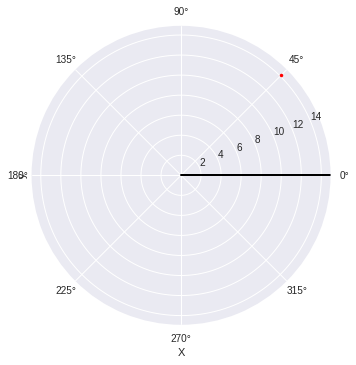

In [156]:
# Polar
# R = sqrt(re(c10)**2 + im(c10)**2)
R = abs(c10)
# theta = atan(im(c10)/re(c10))
theta = phase(c10)

# Plot function
def polar2Plt(zPolar):
  R = zPolar[0]
  theta = zPolar[1]
  plt.polar(theta, R, 'k.', color='red')
  plt.axhline(linewidth=2, color='black')
  plt.axvline(linewidth=2, color='black')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

print("Polar coordinates")
print(R,"∠", theta, "Radians")
print(R,"∠", theta * 180/pi, "°")

zPolar = (R, theta)
polar2Plt(zPolar)

In [164]:
# Transformations
def cart2pol(zCart):
  R = abs(zCart)
  theta = phase(zCart)
  return(R, theta)

def pol2cart(zPolar):
  R = zPolar[0]
  theta = zPolar[1]
  x = R * cos(theta)
  y = R * sin(theta)
  return mpc(x,y)

def pol2DegPrint(zPolar):
  R = zPolar[0]
  theta = zPolar[1]*180/pi
  return (str(R) + " ∠ " + str(theta) + "°")

def pol2PositiveDegPrint(zPolar):
  R = zPolar[0]
  theta = zPolar[1]
  if(theta < 0):
    theta = 360 + theta*180/pi
  return (str(R) + " ∠ " + str(theta) + "°")
  
c10_Polar = cart2pol(c10)
c10_Cart = pol2cart(c10_Polar)
print("Polar Trans Result: \t", c10_Polar)
print("Polar Trans Result Detail: \t", pol2DegPrint(c10_Polar))
print("Cartesian Trans Result: \t", c10_Cart)

Polar Trans Result: 	 (mpf('14.142135623730951'), mpf('0.78539816339744828'))
Polar Trans Result Detail: 	 14.142135623731 ∠ 45.0°
Cartesian Trans Result: 	 (10.0 + 10.0j)


In [197]:
# Transform expresion to mpc
s = 2*I
G = 1/(s*(s+1))

def expr2mpc(expr):
  """
  s = 2*I
  G = 1/(s*(s+1))
  G_Cart = expr2mpc(G)
  """
  complx = expr.as_real_imag()
  return mpc(complx[0], complx[1])

G_Cart = expr2mpc(G)
G_Polar = cart2pol(G_Cart)
print("Polar Trans Result: \t", G_Polar)
print("Polar Trans Result Detail: \t", pol2DegPrint(G_Polar))
print("Polar Trans Result Detail: \t", pol2PositiveDegPrint(G_Polar))
print("Cartesian Trans Result: \t", G_Cart)

Polar Trans Result: 	 (mpf('0.22360679774997899'), mpf('-2.677945044588987'))
Polar Trans Result Detail: 	 0.223606797749979 ∠ -153.434948822922°
Polar Trans Result Detail: 	 0.223606797749979 ∠ 206.565051177078°
Cartesian Trans Result: 	 (-0.2 - 0.1j)


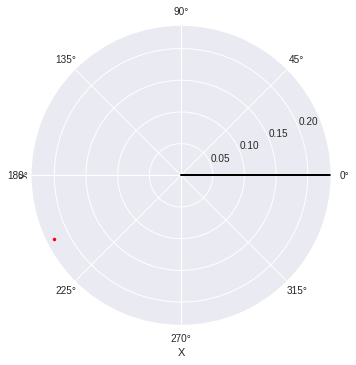

In [175]:
polar2Plt(G_Polar)

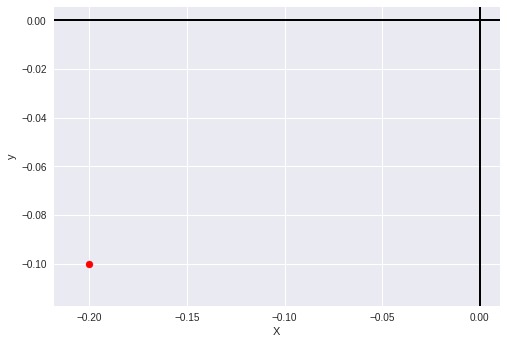

In [176]:
cart2Plt(G_Cart)

In [231]:
# Operations
# Variables
print("c10:\t", c10)
print("c1:\t", c1)
print("c2:\t", c2)

# Conjugate
print("Conjugated c2:\t", conj(c2)) # TOUSE

# Sum
print("Cartesian")
def sumComplx(z1, z2):
  x1, x2 = re(z1), re(z2)
  y1, y2 = im(z1), im(z2)
  return mpc(x1+x2, y1+y2)
print("c1 + c2:\t", sumComplx(c1, c2))
print("c1 + c2:\t", fsum([c1, c2])) # TOUSE

# Sub
def subComplx(z1, z2):
  x1, x2 = re(z1), re(z2)
  y1, y2 = im(z1), im(z2)
  return mpc(x1-x2, y1-y2)
print("c1 - c2:\t", subComplx(c1, c2))
print("c1 - c2:\t", fsum([c1, -c2])) # TOUSE

# Mul
# Cartesian
def mulComplxCart(z1Cart, z2Cart):
  x1, x2 = re(z1Cart), re(z2Cart)
  y1, y2 = im(z1Cart), im(z2Cart)
  return mpc(x1*x2-y1*y2, x1*y2+x2*y1)
print("c1 * c2:\t", mulComplxCart(c1, c2))
print("c1 * c2:\t", fmul(c1, c2)) # TOUSE
print("c1 * c2:\t", fprod([c1, c2])) # TOUSE FOR N NUMBRS

# Div
def divComplxCart(z1Cart, z2Cart):
  z2CartConj = conj(z2Cart)
  num = fprod([z1Cart, z2CartConj])
  den = fprod([z2Cart, z2CartConj])
  return mpc(fraction(re(num),den) , fraction(im(num),den ))
print("c1 / c2:\t", divComplxCart(c1, c2))
print("c1 / c2:\t", fdiv(c1, c2)) # TOUSE
# asd = mpc(6,3)
# zxc = mpc(7,-5)
# print("c1 / c2:\t", divComplxCart(asd, zxc))
# print("c1 / c2:\t", fdiv(asd, zxc)) # TOUSE

c10:	 (10.0 + 10.0j)
c1:	 (1.0 + 1.0j)
c2:	 (2.0 + 2.0j)
Conjugated c2:	 (2.0 - 2.0j)
Cartesian
c1 + c2:	 (3.0 + 3.0j)
c1 + c2:	 (3.0 + 3.0j)
c1 - c2:	 (-1.0 - 1.0j)
c1 - c2:	 (-1.0 - 1.0j)
c1 * c2:	 (0.0 + 4.0j)
c1 * c2:	 (0.0 + 4.0j)
c1 * c2:	 (0.0 + 4.0j)
c1 / c2:	 (0.5 + 0.0j)
c1 / c2:	 (0.5 + 0.0j)


In [225]:
# Ejercicios

#A = sqrt(3) + iies
A = mpc(sqrt(3), 1)
# Ai = sqrt(3) - I
Aconj = conj(A)
# B = 1 + I
B = mpc(1, 1)
# C = -3 + I*4
C = mpc(-3, 4)
# H = (A*Ai) / (B+C)
H_Cart = (A*Aconj) / (B+C)
H_Polar = cart2pol(H_Cart)

print("Polar Trans Result: \t", H_Polar)
print("Polar Trans Result Detail: \t", pol2DegPrint(H_Polar))
print("Polar Trans Result Detail: \t", pol2PositiveDegPrint(H_Polar))
print("Cartesian Trans Result: \t", H_Cart)

Polar Trans Result: 	 (mpf('0.74278135270820733'), mpf('-1.9513027039072615'))
Polar Trans Result Detail: 	 0.742781352708207 ∠ -111.801409486352°
Polar Trans Result Detail: 	 0.742781352708207 ∠ 248.198590513648°
Cartesian Trans Result: 	 (-0.275862068965517 - 0.689655172413793j)


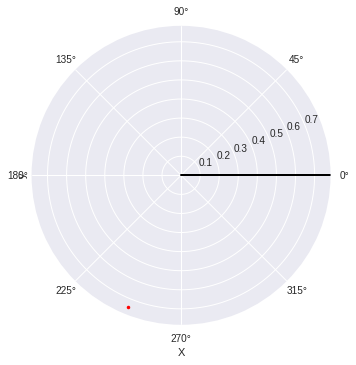

In [223]:
polar2Plt(H_Polar)

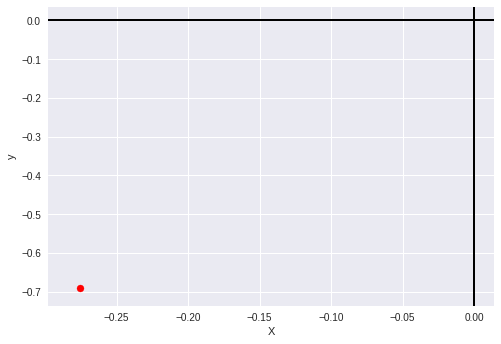

In [224]:
cart2Plt(H_Cart)